<h1>Лабораторная работа №2. Многомерный нормальный закон распределения</h1>

In [1]:
var = 4

import matplotlib.pyplot as plot
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np
import scipy.stats as sps
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
import random

plot.style.use('bmh')

<h2>Основные задания</h2>
<blockquote>
<i>
0. Загрузить 4-хмерную выборку из файла “VarN.csv”, где N – номер варианта, он же номер в
списке подгруппы (см. таблицу с текущим рейтингом). Объем выборки – 400 наблюдений.
</i>
</blockquote>

In [2]:
data = pd.read_csv(f'var{var}.csv', sep = ';')

for col in data.columns:
    for i in range(len(data)):
        data.at[i, col] = (data.loc[i, col]).replace(',', '.')

data = data.apply(pd.to_numeric)

<blockquote>
<i>
1. По выборке оценить вектор математического ожидания μ и ковариационную матрицу Σ
(можно использовать смещенные оценки).
</i>
</blockquote>

In [3]:
df = pd.DataFrame(data.mean(),
                  index=pd.Index(['x1', 'x2', 'x3', 'x4']),
                  columns=['Математическое ожидание'])
df.style

,Математическое ожидание
x1,2.932297
x2,-1.337879
x3,-2.548610
x4,7.295135


In [4]:
data.cov()

,x1,x2,x3,x4
x1,5.965353,0.536859,0.396709,14.365728
x2,0.536859,3.104585,2.672410,1.337658
x3,0.396709,2.672410,9.939905,1.009263
x4,14.365728,1.337658,1.009263,34.957567


<blockquote>
<i>
2. Оценить коэффициенты корреляции между всеми парами переменных.
</i>
</blockquote>

In [5]:
data.corr(method = 'pearson')

,x1,x2,x3,x4
x1,1.000000,0.124750,0.051518,0.994807
x2,0.124750,1.000000,0.481072,0.128402
x3,0.051518,0.481072,1.000000,0.054143
x4,0.994807,0.128402,0.054143,1.000000


<h2>Бонусные задания</h2>
<h3>Проверка о принадлежности выборки к нормальному закону распределения</h3>
<blockquote>
<i>
3. (0,5 балла) Постройте гистограммы для каждой переменной из выборки. Похожи ли
гистограммы на плотность распределения нормального закона?
</i>
</blockquote>

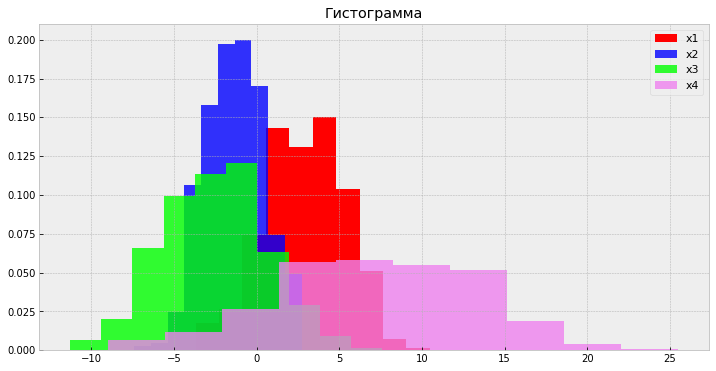

In [6]:
plot.figure(figsize = (12, 6))

colors = ['red', 'blue', 'lime', 'violet']
labels = ['x1', 'x2', 'x3', 'x4']

plot.hist(data['x1'], density = 1, color = colors[0], label = labels[0], alpha = 1)
plot.hist(data['x2'], density = 1, color = colors[1], label = labels[1], alpha = 0.8)
plot.hist(data['x3'], density = 1, color = colors[2], label = labels[2], alpha = 0.8)
plot.hist(data['x4'], density = 1, color = colors[3], label = labels[3], alpha = 0.8)
plot.legend(prop = {'size' : 11})
plot.title('Гистограмма')
plot.show()

<blockquote>
<i>
4. (1 балл за первый тест + 0,5 за каждый следующий) Для каждой переменой проверить
гипотезы согласия о принадлежности выборки к нормальному закону распределения.
Рекомендуемые тесты: Хи-квадрат Пирсона, Колмогорова-Смирнова, Шапиро-Уилка (можно
использовать другие тесты согласия). Сделать вывод.
</i>
</blockquote>

In [7]:
from statsmodels.stats.diagnostic import lilliefors

x1Res = list()
x2Res = list()
x3Res = list()
x4Res = list()
x5Res = list()
x6Res = list()
ref = 5 * np.random.randn(100) + 50

methods = ['shapiro', 'dagostino', 'ks', 'jarque', 'lilliefors']

def testMethod(data, method, dlist = list()):
    if method == 'shapiro':
        stat, pvalue = sps.shapiro(data)
    elif method == 'dagostino':
        stat, pvalue = sps.normaltest(data)
    elif method == 'ks':
        stat, pvalue = sps.kstest(data, 'norm', args = (data.mean(), data.std()))
    elif method == 'jarque':
        stat, pvalue = sps.jarque_bera(data)
    elif method == 'lilliefors':
        stat, pvalue = lilliefors(data)
    else:
        stat = np.NaN
        pvalue = np.NaN
    dlist.append(stat)
    dlist.append(pvalue)
    return stat, pvalue
        
for col in data.columns:       
    for meth in methods:
        if col == 'x1':
            testMethod(data[col], meth, x1Res)
        elif col == 'x2':
            testMethod(data[col], meth, x2Res)
        elif col == 'x3':
            testMethod(data[col], meth, x3Res)
        elif col == 'x4':
            testMethod(data[col], meth, x4Res)
            
df = pd.DataFrame([x1Res, x2Res, x3Res, x4Res],
                  index=pd.Index(['x1', 'x2', 'x3', 'x4']),
                  columns=pd.MultiIndex.from_product([['Шапиро-Уилка', 'K-квадрат Д\'Агостино', 'Колмогорова-Смирнова', 'Харке - Бера', 'Лиллиефорса'],['Statistics', 'P-Value']], names=['Тест:', ' ']))
df.style

<blockquote>
<i>
5. (1 балл за уникальный пример) Как известно, в общем случае из того факта, что все
одномерные маргинальные распределения являются нормальными не следует, что и совместное
распределение случайного вектора тоже является нормальным? Приведите пример двумерного
вектора, у которого каждая компонента по-отдельности имеет нормальный закон распределения, но
совместное распределение не является нормальным.
</i>
</blockquote>
      
$$
f\left(y_{1}, y_{2}\right)=(2 \pi)^{-1} \exp \left[-\frac{1}{2}\left(y_{1}^{2}+y_{2}^{2}\right)\right]\left\{1+y_{1} y_{2} \exp \left[-\frac{1}{2}\left(y_{1}^{2}+y_{2}^{2}\right)\right]\right\}
$$

<h3>Эллипсы концентрации</h3>
<blockquote>
<i>
6. (0,5 балла) Изобразить диаграмму рассеяния первой и второй переменной выборки (по оси x
откладывать значения X1, а по оси y – X2 или наоборот).
    
7. (1 балл) На том же графике изобразить несколько эллипсов концентрации – малого, среднего
и большого радиуса (эллипсоид концентрации для многомерного нормального закона – изолиния,
вдоль которой плотность распределения не изменяется). Вместо точных значений математического
ожидания и ковариационной матрицы используйте соответствующие оценки.
</i>
</blockquote>

In [8]:
def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

In [9]:
df = pd.DataFrame(data.mean(),
                  index=pd.Index(['x1', 'x2', 'x3', 'x4']),
                  columns=['Математическое ожидание'])
df.style

,Математическое ожидание
x1,2.932297
x2,-1.337879
x3,-2.548610
x4,7.295135


In [10]:
data.cov()

,x1,x2,x3,x4
x1,5.965353,0.536859,0.396709,14.365728
x2,0.536859,3.104585,2.672410,1.337658
x3,0.396709,2.672410,9.939905,1.009263
x4,14.365728,1.337658,1.009263,34.957567


In [11]:
data.corr()

,x1,x2,x3,x4
x1,1.000000,0.124750,0.051518,0.994807
x2,0.124750,1.000000,0.481072,0.128402
x3,0.051518,0.481072,1.000000,0.054143
x4,0.994807,0.128402,0.054143,1.000000


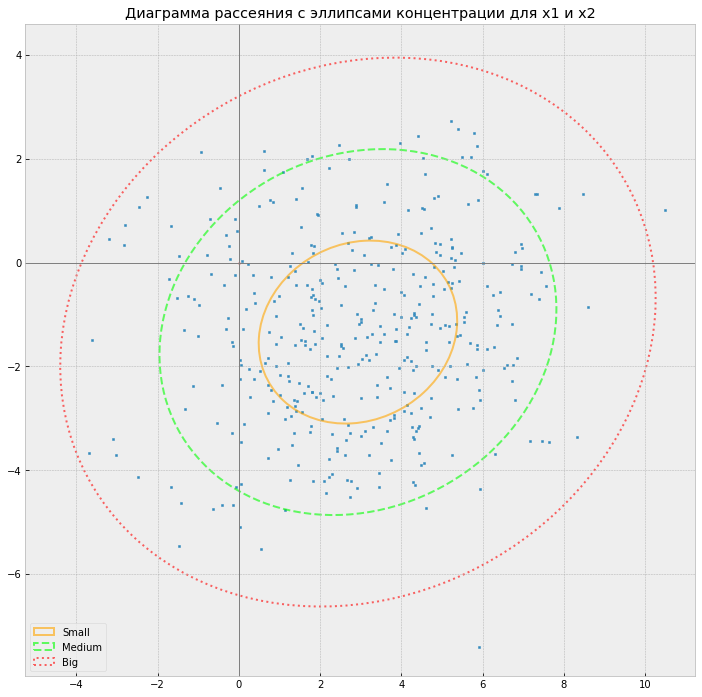

In [12]:
def ellipseScatter(x ,y, title):
    fig, ax_nstd = plot.subplots(figsize=(12, 12))

    mu = 0, 0

    ax_nstd.axvline(c = 'grey', lw = 1)
    ax_nstd.axhline(c = 'grey', lw = 1)

    ax_nstd.scatter(x, y, s = 4, marker = 's')

    confidence_ellipse(x, y, ax_nstd, n_std = 1, label = 'Small', edgecolor = 'orange', lw = 2 , alpha = 0.6)
    confidence_ellipse(x, y, ax_nstd, n_std = 2, label = 'Medium', edgecolor = 'lime', lw = 2, linestyle = '--', alpha = 0.6)
    confidence_ellipse(x, y, ax_nstd, n_std=3, label = 'Big', edgecolor = 'red', lw = 2, linestyle = ':', alpha = 0.6)

    ax_nstd.scatter(mu[0], mu[1], c = 'red', s = 3)
    ax_nstd.set_title(f'Диаграмма рассеяния с эллипсами концентрации {title}')
    ax_nstd.legend()
    plot.show()
    
ellipseScatter( data['x1'],  data['x2'], 'для x1 и x2')

<blockquote>
<i>
8. (0,5 балла) Повторите шаги 6-7 для первой и третьей и первой и четвертой переменных
выборки. Как изменяются эллипсы концентрации, что можно сказать об их форме?
</i>
</blockquote>

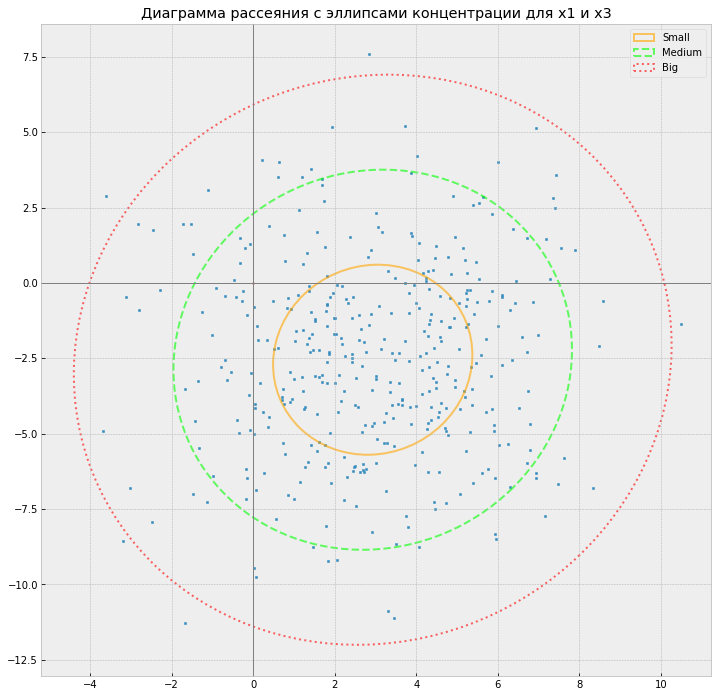

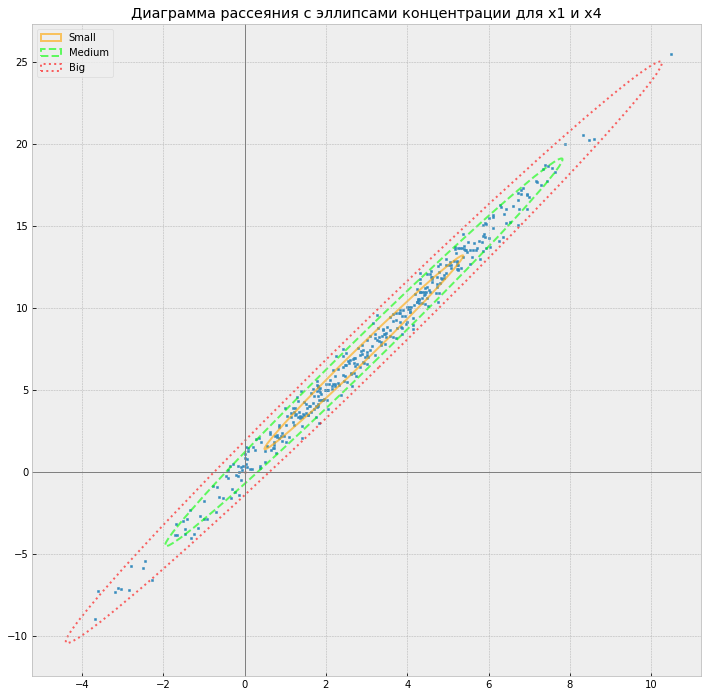

In [13]:
ellipseScatter( data['x1'],  data['x3'], 'для x1 и x3')
ellipseScatter( data['x1'],  data['x4'], 'для x1 и x4')

<h3>Линейные преобразования нормальных случайных величин</h3>
<blockquote>
<i>
9. (2 балл) Пусть y1 = k1∙x1 +k3∙x3, y2 = k2∙x1 + k4∙x4. Какой закон распределения будет у вектора
(y1, y2)? Найдите математическое ожидание и ковариационную матрицу нового вектора 2-мя
способами: а) эмпирически: сгенерируйте новую двумерную выборку, для которой постройте
соответствующие оценки; б) по формулам μNew = Cμ, ΣNew = CΣC
T
, где С – матрица линейного
преобразования. Вместо точных значений математического ожидания и ковариационной матрицы
используйте соответствующие оценки. Коэффициенты k1, k2, k3 и k4 представлены в таблице в конце
файла.
</i>
</blockquote>

In [14]:
k1 = 1
k2 = 6
k3 = 9
k4 = 9

meanVector = data.mean()
varVector = data.var()

y1 = k1 * data['x1'] + k3 * data['x3']
y2 = k2 * data['x2'] + k4 * data['x4']
C = pd.DataFrame(data = {'0': [k1, k3], '1': [k2, k4]})

newdata = pd.DataFrame(data = {'y1': y1, 'y2': y2})
dataVector = list()

for col in newdata.columns:
    dataVector.append(np.mean(newdata[col]))

meanMatrix = pd.DataFrame(data = {'0': [meanVector[0], meanVector[2]], '1': [meanVector[1], meanVector[3]]})
meanMatrix = (C * meanMatrix).sum()

df = pd.DataFrame([dataVector, meanMatrix],
                  index=pd.Index(['Эмпирически', 'Cμ']),
                  columns=['y1', 'y2'])
df.style

,y1,y2
Эмпирически,-20.005190,57.628943
Cμ,-20.005190,57.628943


In [15]:
newdata.cov()

,y1,y2
y1,818.238424,358.573128
y2,358.573128,3087.795090


<h3>Смесь распределений.</h3>
<blockquote>
<i>
10. (0,5 балла) Сгенерировать новую переменную по следующему правилу: x5 = α x1 + (1-α)x2, где
α – случайная величина Бернулли с вероятностью успеха π (выбрать самостоятельно из диапазона от
0.2 до 0.4). Оценить математическое ожидание и дисперсию новой случайной величины.
</i>
</blockquote>

In [16]:
alpha = 0.38
x5 = pd.DataFrame(data = {'x5': [0.0 for x in range(400)]})

for i in range(len(data)):
    col = random.choices(['x1', 'x2'], weights=[alpha, 1 - alpha])
    x5.at[i, 'x5'] = data.loc[i, col]

df = pd.DataFrame([x5.mean(), x5.var()],
                  index=pd.Index(['Математическое ожидание', 'Дисперсия']),
                  columns=['x5'])
df.style

,x5
Математическое ожидание,0.244275
Дисперсия,8.545964


<blockquote>
<i>
11. (0,5 балла) Построить гистограмму для переменной x5.
</i>
</blockquote>

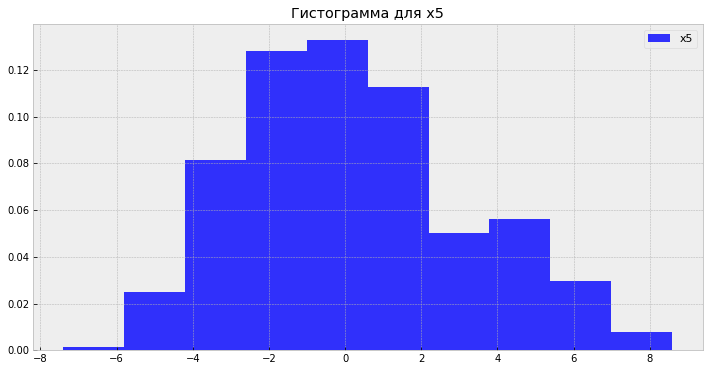

In [17]:
plot.figure(figsize = (12, 6))

plot.hist(x5, density = 1, color = colors[1], label = 'x5', alpha = 0.8, bins = 10)
plot.legend(prop = {'size' : 11})
plot.title('Гистограмма для x5')
plot.show()

<blockquote>
<i>    
12. (1 балл) Найти формулы вычисления математического ожидания и дисперсии смеси
распределений и вычислить для своей смеси. Сравнить полученные теоретические моменты с
оценками, построенными в пункте 10.
</i>
</blockquote>


$$
\text {Математическое ожидание для смеси распределений:}\\
\mathrm{E}[X]=\mu=\sum_{i=1}^{n} w_{i} \mu_{i}
$$

$$
\text {Дисперсия для смеси распределений:}\\
\mathrm{E}\left[(X-\mu)^{2}\right]=\sigma^{2}=\sum_{i=1}^{n} w_{i}\left(\sigma_{i}^{2}+\mu_{i}^{2}\right)-\mu^{2}
$$

In [18]:
m = meanVector[0] * alpha + meanVector[1] * (1 - alpha)
d = alpha * (meanVector[0] ** 2 + varVector[0]) + (1 - alpha) * (meanVector[1] ** 2 + varVector[1]) - m ** 2

df = pd.DataFrame([m, d],
                  index=pd.Index(['Математическое ожидание', 'Дисперсия']),
                  columns=['x5'])
df.style

,x5
Математическое ожидание,0.284788
Дисперсия,8.487702
